# Task 1 (Regression)

In [1]:
! pip install kaggle
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression
! unzip "salary-dataset-simple-linear-regression.zip"

!kaggle datasets download -d parteekbhatia/polynomial-linear-regression-dataset
! unzip "polynomial-linear-regression-dataset.zip"

!kaggle datasets download -d hussainnasirkhan/multiple-linear-regression-dataset
! unzip "multiple-linear-regression-dataset.zip"

Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
License(s): CC0-1.0
salary-dataset-simple-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  salary-dataset-simple-linear-regression.zip
replace Salary_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Dataset URL: https://www.kaggle.com/datasets/parteekbhatia/polynomial-linear-regression-dataset
License(s): unknown
polynomial-linear-regression-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  polynomial-linear-regression-dataset.zip
replace rank_salary.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Dataset URL: https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset
License(s): CC0-1.0
multiple-linear-regression-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  multiple-linear-regression-

In [3]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
df_reg = pd.read_csv('multiple_linear_regression_dataset.csv')

X_reg = df_reg.iloc[:, :-1]
y_reg = df_reg.iloc[:, -1]

### With K Folds

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

model_reg = LinearRegression()
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model_reg, X_reg, y_reg, cv = k_folds)

In [6]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.9268533  0.84713119 0.94192122 0.96508498 0.9846543 ]
Average CV Score:  0.9331289972266468
Number of CV Scores used in Average:  5


### Regular Fitting

In [7]:
model_reg_2 = LinearRegression()
model_reg_2.fit(X_reg, y_reg)

LinearRegression()

In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model_reg_2.predict(X_reg)
print(f'R2 Score: {r2_score(y_reg, y_pred)}')
print(f'MSE: {mean_squared_error(y_reg, y_pred)}')
print(f'MAE: {mean_absolute_error(y_reg, y_pred)}')

R2 Score: 0.9773361310180797
MSE: 1533633.9787141788
MAE: 981.6200260438507


# Task 2 (Classification)

In [9]:
df_class = pd.read_csv('student_dropout.csv')
df_class.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [10]:
df_class.shape

(4424, 37)

In [11]:
df_class.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [12]:
X_class = df_class.drop('Target', axis=1)
y_class = df_class['Target']

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y_class)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_class, y_encoded, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

xg_model = xgb.XGBClassifier()
xg_model.fit(X_train_scaled, y_train)

select_model = SelectFromModel(xg_model, prefit=True)
X_train_selected = select_model.transform(X_train_scaled)
X_test_selected = select_model.transform(X_test_scaled)

In [18]:
print(f"Before xgboost: {X_train_scaled.shape}")
print(f"After xgboost: {X_train_selected.shape}")

Before xgboost: (3539, 36)
After xgboost: (3539, 7)


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

Accuracy: 0.7457627118644068
Precision: 0.7174566042099365
Recall: 0.7457627118644068
F1 Score: 0.7207601385435215
Confusion Matrix:
[[239  24  53]
 [ 48  31  72]
 [  9  19 390]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       316
           1       0.42      0.21      0.28       151
           2       0.76      0.93      0.84       418

    accuracy                           0.75       885
   macro avg       0.66      0.63      0.63       885
weighted avg       0.72      0.75      0.72       885



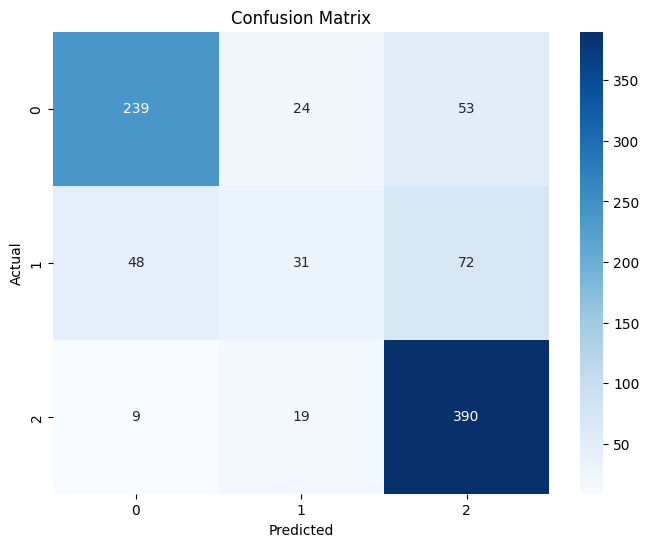

In [20]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_selected, y_train)

lr_pred = lr_model.predict(X_test_selected)

accuracy = accuracy_score(y_test, lr_pred)
precision = precision_score(y_test, lr_pred, average='weighted')
recall = recall_score(y_test, lr_pred, average='weighted')
f1 = f1_score(y_test, lr_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, lr_pred))



plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

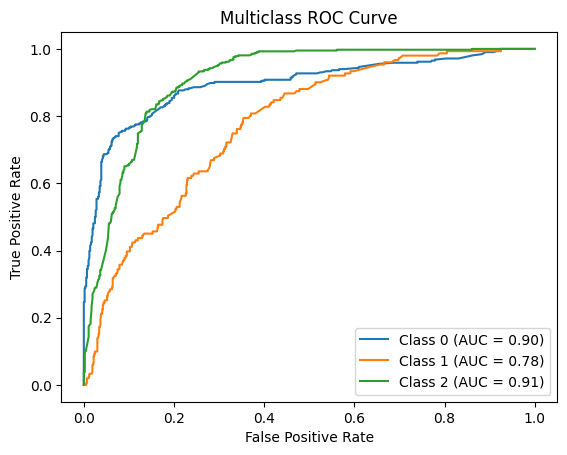

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_multiclass_roc_curve(true_y, y_prob, n_classes):
    true_y_bin = label_binarize(true_y, classes=list(range(n_classes)))
    plt.figure()

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(true_y_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curve')
    plt.legend(loc="best")
    plt.show()

n_classes = len(np.unique(y_test))
plot_multiclass_roc_curve(y_test, lr_model.predict_proba(X_test_selected), n_classes)
